## Review

Hi Pablo. This is Soslan again. As always, I've added all my comments to new cells with different coloring.

<div class="alert alert-success" role="alert">
  If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work so I can accept it then the color will be red
</div>

Your project is of good quality. All the checkpoints were done correctly. So I accept the project by the first iteration. Thank you for your work and good luck in future learning.

---

## Step 4. Exploratory data analysis (Python)

### Import data

In [1]:
import pandas as pd
taxi_trips= pd.read_csv('/datasets/project_sql_result_01.csv')
taxi_description= pd.read_csv('/datasets/project_sql_result_04.csv')

### Study the data they contain

In [2]:
taxi_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
taxi_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [4]:
taxi_trips.isna().mean()

company_name    0.0
trips_amount    0.0
dtype: float64

In [5]:
taxi_description.isna().mean()

dropoff_location_name    0.0
average_trips            0.0
dtype: float64

### Make sure the data types

In [6]:
taxi_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


These are the ones that it is include the contact number of the company

In [7]:
[col.split() for col in taxi_trips['company_name'] for row in col.split() if row.isdigit()]


[['24', 'Seven', 'Taxi'],
 ['5', 'Star', 'Taxi'],
 ['303', 'Taxi'],
 ['6742', '-', '83735', 'Tasha', 'Ride', 'Inc'],
 ['6742', '-', '83735', 'Tasha', 'Ride', 'Inc'],
 ['3591', '-', '63480', 'Chuks', 'Cab'],
 ['3591', '-', '63480', 'Chuks', 'Cab'],
 ['1469', '-', '64126', 'Omar', 'Jada'],
 ['1469', '-', '64126', 'Omar', 'Jada'],
 ['6743', '-', '78771', 'Luhak', 'Corp'],
 ['6743', '-', '78771', 'Luhak', 'Corp'],
 ['0118', '-', '42111', 'Godfrey', 'S.', 'Awir'],
 ['0118', '-', '42111', 'Godfrey', 'S.', 'Awir'],
 ['6574', '-', 'Babylon', 'Express', 'Inc.'],
 ['1085', '-', '72312', 'N', 'and', 'W', 'Cab', 'Co'],
 ['1085', '-', '72312', 'N', 'and', 'W', 'Cab', 'Co'],
 ['2809', '-', '95474', 'C', '&', 'D', 'Cab', 'Co', 'Inc.'],
 ['2809', '-', '95474', 'C', '&', 'D', 'Cab', 'Co', 'Inc.'],
 ['2092', '-', '61288', 'Sbeih', 'Company'],
 ['2092', '-', '61288', 'Sbeih', 'Company'],
 ['3011', '-', '66308', 'JBL', 'Cab', 'Inc.'],
 ['3011', '-', '66308', 'JBL', 'Cab', 'Inc.'],
 ['3620', '-', '52292', 

In [8]:
taxi_description

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


It seems that the data from taxi_description has the convenient data type and in the other case, taxi_trips has a column name of the companies where it is collected the contact from some companies.

<div class="alert alert-success" role="alert">
Great. Data was opened and examined correctly.</div>

### Identify the top 10 neighborhoods in terms of drop-offs

In [9]:
taxi_description.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

In [10]:
taxi_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [11]:
taxi_amount=taxi_trips.groupby('company_name')['trips_amount'].agg('sum').to_frame()
taxi_amount

,trips_amount
company_name,
0118 - 42111 Godfrey S. Awir,33
1085 - 72312 N and W Cab Co,29
1469 - 64126 Omar Jada,36
2092 - 61288 Sbeih Company,27
2192 - 73487 Zeymane Corp,14
...,...
Sun Taxi,7701
Taxi Affiliation Service Yellow,9299
Taxi Affiliation Services,11422


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8b9c70890>],
      dtype=object)

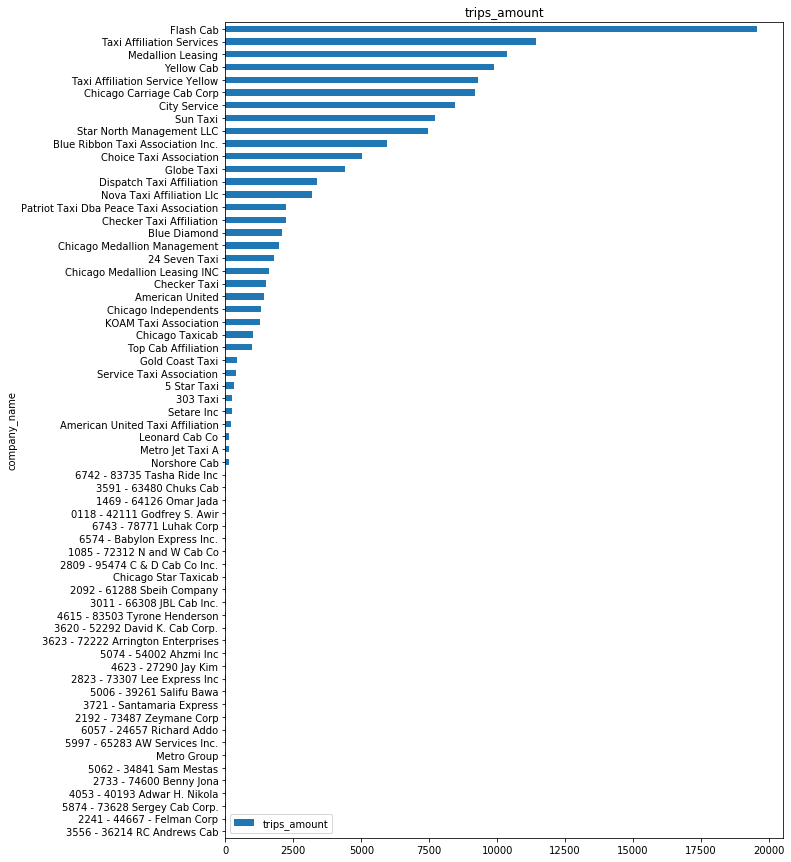

In [12]:
taxi_amount.sort_values(by='trips_amount').plot(kind='barh', subplots=True, figsize=(10,15))

Note that only 35 taxi companies has representative trips amount and the rest has insignificant values

In [13]:
quantile_75= taxi_amount['trips_amount'].quantile(.75)
rep_trips=taxi_amount.query("trips_amount>=@quantile_75").reset_index()
rep_trips

,company_name,trips_amount
0,Blue Ribbon Taxi Association Inc.,5953
1,Checker Taxi Affiliation,2216
2,Chicago Carriage Cab Corp,9181
3,Choice Taxi Association,5015
4,City Service,8448
5,Dispatch Taxi Affiliation,3355
6,Flash Cab,19558
7,Globe Taxi,4383
8,Medallion Leasing,10367
9,Nova Taxi Affiliation Llc,3175


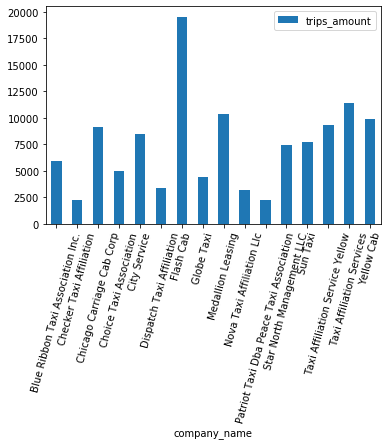

In [14]:
rep_trips.plot(kind='bar', x='company_name', rot=75)

Now w go on top 10 neighborhoods by number of dropoffs

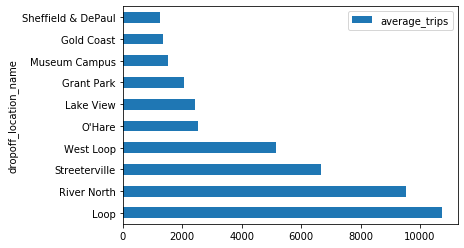

In [15]:
top_10=taxi_description.sort_values(by='average_trips', ascending=False).head(10)
top_10.plot(kind='barh',x='dropoff_location_name', y='average_trips')

In [16]:
top_10.describe()

,average_trips
count,10.000000
mean,4324.986667
std,3530.183508
min,1259.766667
25%,1649.633333
50%,2483.933333
75%,6289.416667
max,10727.466667


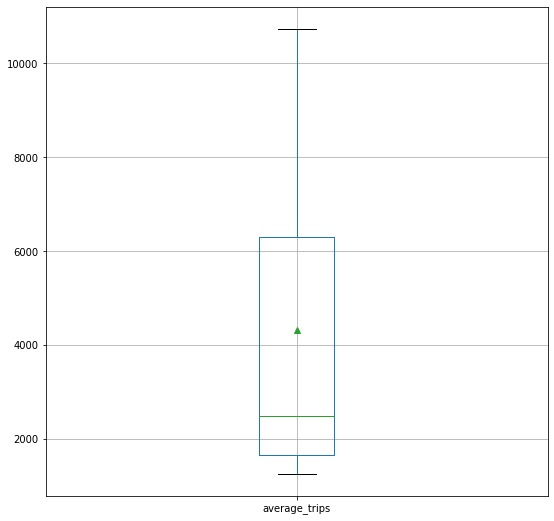

In [17]:
top_10.boxplot(figsize=(9,9), grid=True, showmeans=True)

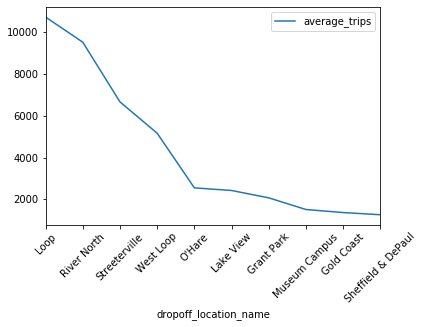

In [18]:
top_10.plot(kind='line',x='dropoff_location_name', y='average_trips', rot=45)

## Conclusion

## In the dataset taxi_trips it is remarkable the amount of trips from taxi companies that has no contact number include in their names, cause these ones are no representative. The graph for the rest is similar to a poisson distribution and present a long tail at the right side. In the other top ten dataset taxi_description there is no normal distribution and concentrate most of the data inside the interquantile and the line graph present no breaks or peaks.

<div class="alert alert-success" role="alert">
Good. Correct step.</div>

## Step 5. Testing hypotheses (Python)

In [19]:
loop= pd.read_csv('/datasets/project_sql_result_07.csv')

In [20]:
loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [24]:
loop['duration_seconds']= loop['duration_seconds'].astype('int')
loop['start_ts']= pd.to_datetime(loop['start_ts'], format= '%Y-%m-%d %H')
loop['day_of_week']=loop['start_ts'].dt.weekday

In [25]:
loop

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0,5
1064,2017-11-11 10:00:00,Good,1318,5
1065,2017-11-11 13:00:00,Good,2100,5
1066,2017-11-11 08:00:00,Good,1380,5


### Test the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Here the null-hypothesis represents that average rides duration from rainy days has no variation from the rest. The alternative hypothesis represents the differences between averages duration from rainy days in comparison with the rest.

    Ho: rain.mean== good.mean
    H1: rain.mean!= good.mean

In [26]:
rain_day= loop.query("weather_conditions=='Bad'and day_of_week=='5'")
good_day= loop.query("weather_conditions=='Good'and day_of_week=='5'")

In [27]:
from scipy import stats as st
duration_rain= rain_day['duration_seconds'].to_list()
duration_good= good_day['duration_seconds'].to_list()
alpha=.05
results = st.ttest_ind(
    duration_rain,
    duration_good,
    
)
print('p_value', results.pvalue)
if (results.pvalue<alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p_value 6.517970327099473e-12
We reject the null hypothesis


## Conclusion

## Clearly note that we reject the null-hypothesis as its low p_value shows so it motivate us to think that we asume teh difference between average duration rides in different weather conditions. It doesn't matter what alpha we choose because the p_value continues to be a small value if we compare with any alpha.

<div class="alert alert-success" role="alert">
Correct hypothesis testing and conclusion.</div>